## Install 

In [40]:
%pip install matplotlib
%pip install scikit-learn

Python(13507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


Python(13508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


## Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to preprocess the dataset

In [42]:
def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data['Hour'] = data['Timestamp'].dt.hour
    data['Minute'] = data['Timestamp'].dt.minute
    data['Second'] = data['Timestamp'].dt.second
    
    features = ['Voltage', 'Current', 'Power', 'Frequency', 'PF', 'Hour', 'Minute', 'Second']
    target = 'Energy'
    X = data[features]
    y = data[target]
    return X, y

In [43]:
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.plot(y_test.values, label='Actual', alpha=0.7)
    plt.plot(y_pred, label='Predicted', alpha=0.7)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Energy Power')
    plt.legend()
    plt.grid()
    plt.show()

    
def plot_percentage_accuracy(results):
    """
    Plots percentage accuracy for each model across datasets as a bar chart.
    """
    for dataset, metrics in results.items():
        model_names = list(metrics.keys())
        accuracies = [metrics[model]["Percentage Accuracy"] for model in model_names]
        
        plt.figure(figsize=(10, 6))
        plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
        plt.title(f"Percentage Accuracy Across Models for {dataset}")
        plt.ylabel("Percentage Accuracy (%)")
        plt.xlabel("Models")
        plt.ylim(0, 100)  # Accuracy should range between 0 and 100
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        for i, acc in enumerate(accuracies):
            plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', va='bottom', fontsize=10)
        plt.show()

## Ingest data

In [44]:
idle_path = '../data/80_normal.csv'  # Path to idle data
test_paths = ['../data/idle.csv', '../data/low.csv', '../data/20_normal.csv', '../data/variable.csv']  # Paths to test data

# Preprocess idle dataset
X_idle, y_idle = preprocess_data(idle_path)

# Normalize features
scaler = StandardScaler()
X_idle_scaled = scaler.fit_transform(X_idle)

X_train_idle, X_test_idle, y_train_idle, y_test_idle = train_test_split(X_idle_scaled, y_idle, test_size=0.2, random_state=42)


## Intialize model

In [45]:
models = {
    "SVR": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10, min_samples_split=4, min_samples_leaf=2)
}

## Train models

In [46]:
# Train models on idle dataset
trained_models = {}
for name, model in models.items():
    model.fit(X_train_idle, y_train_idle)
    trained_models[name] = model

## Evaluate

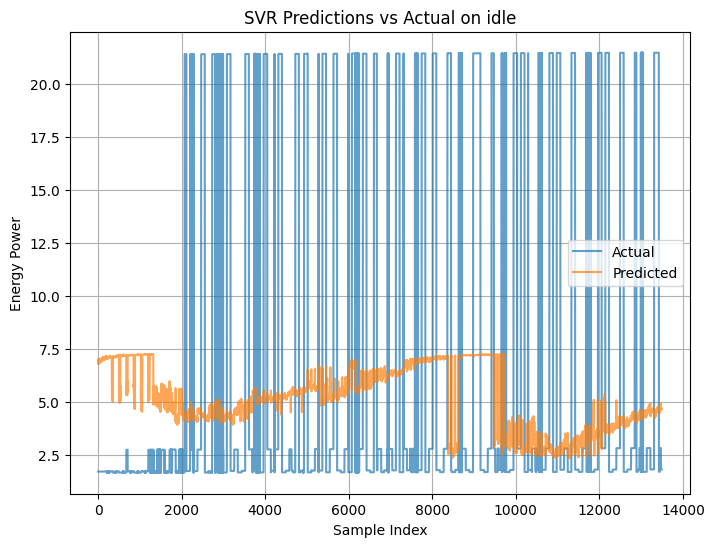

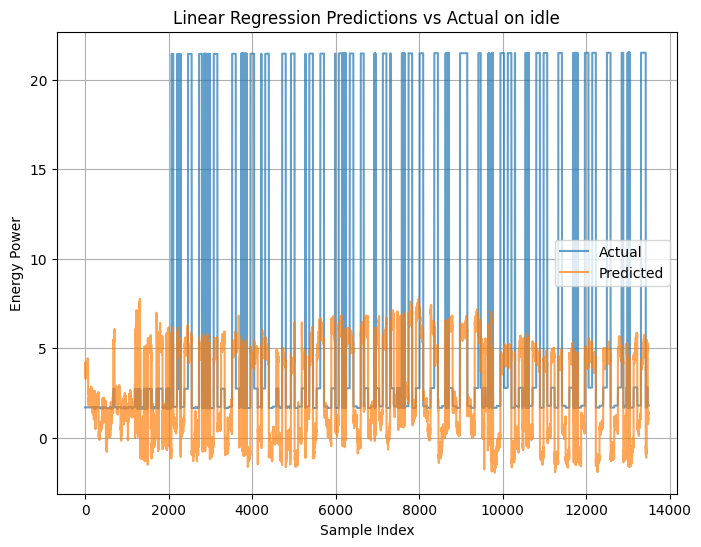

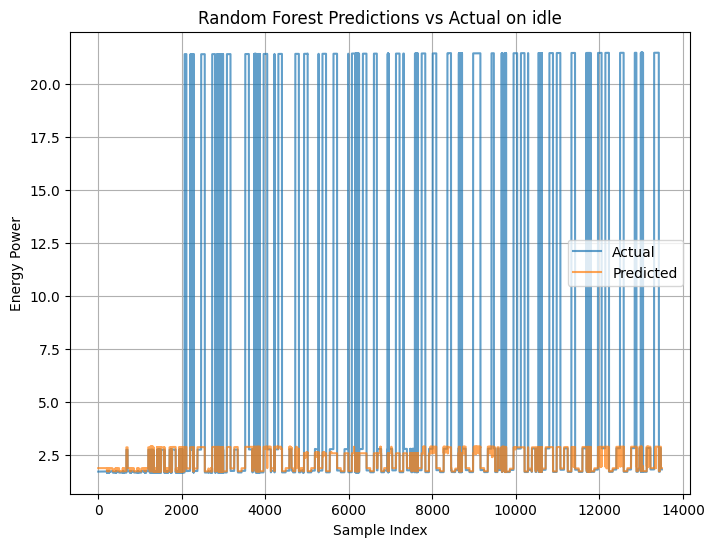

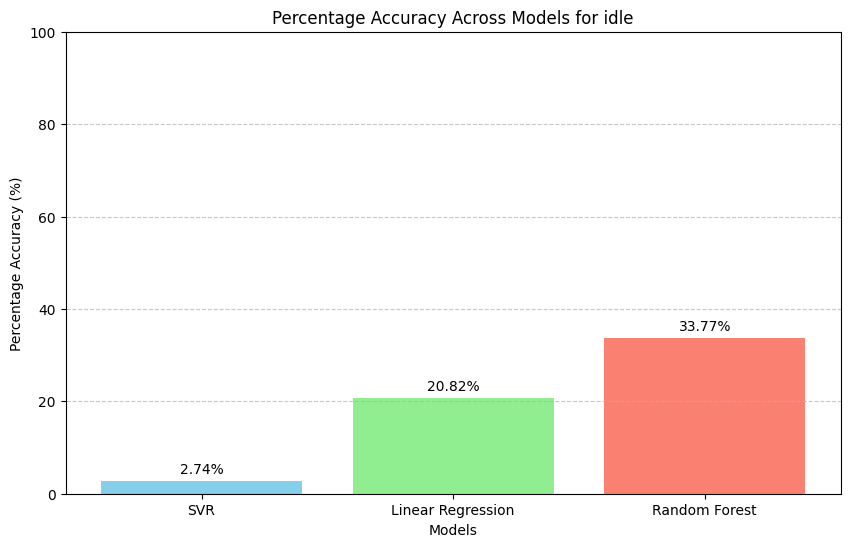

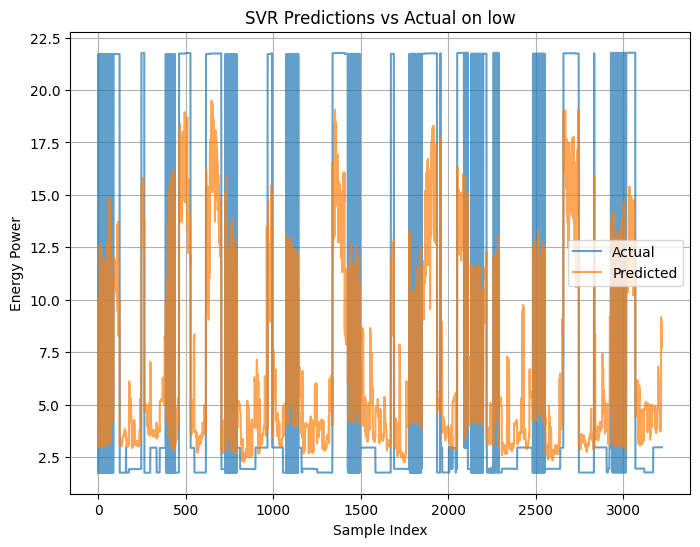

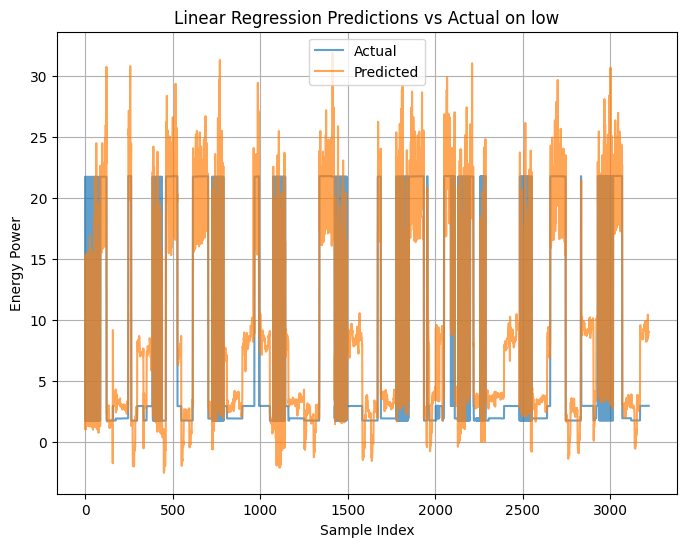

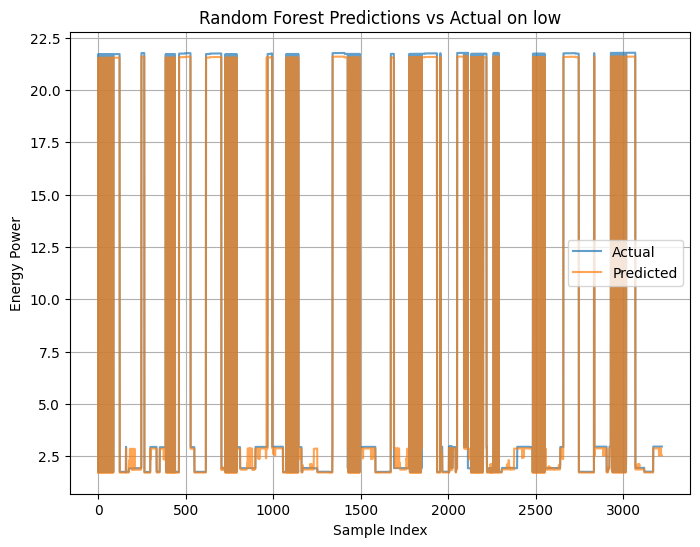

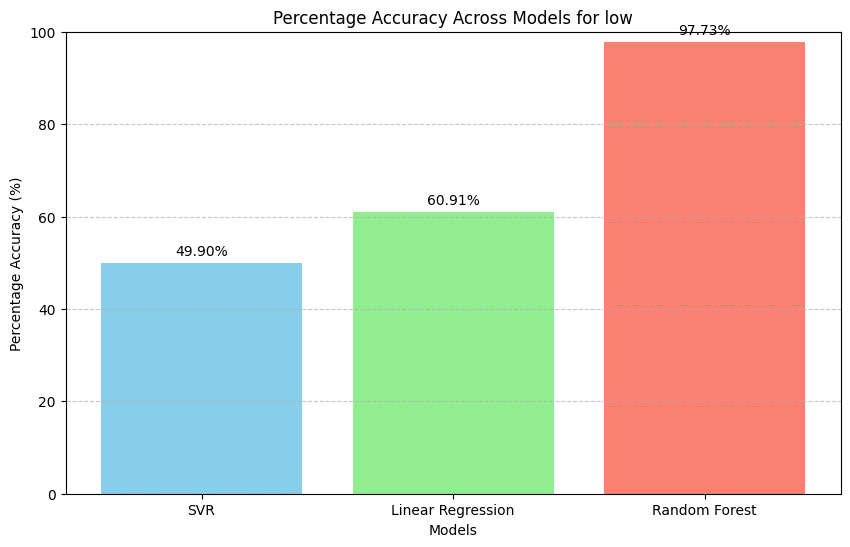

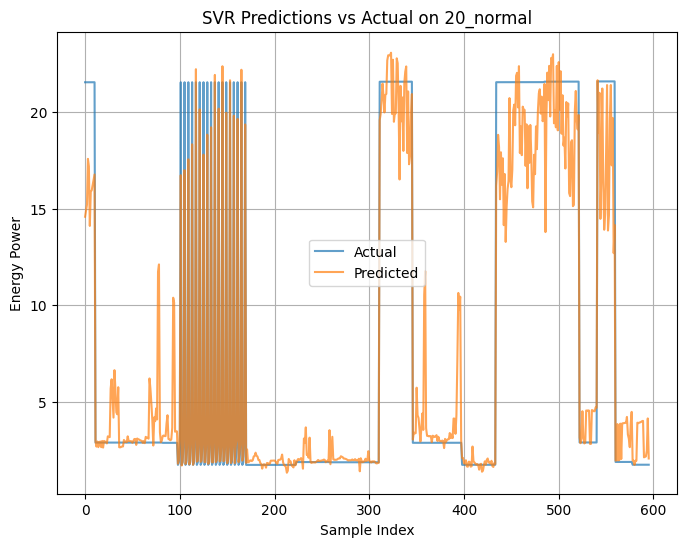

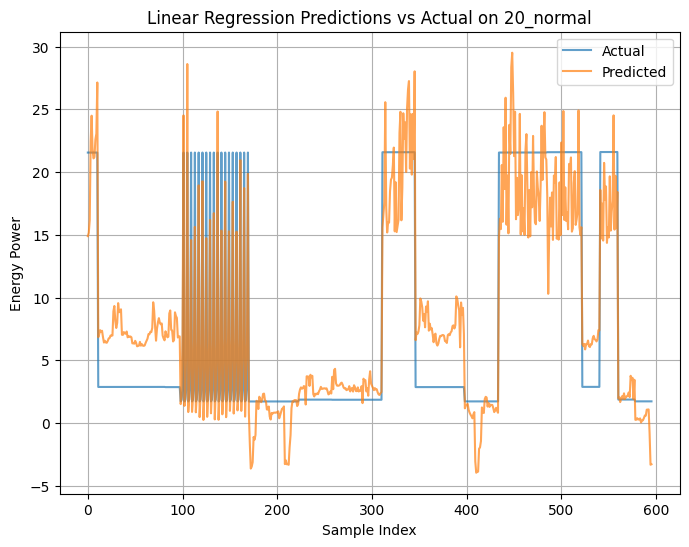

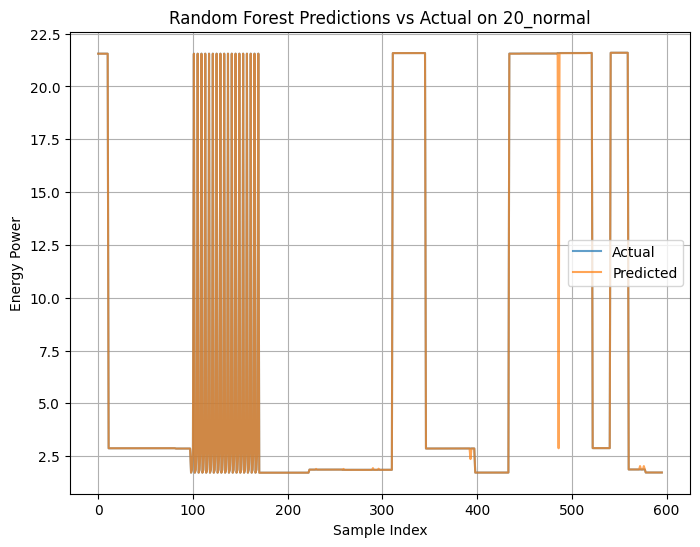

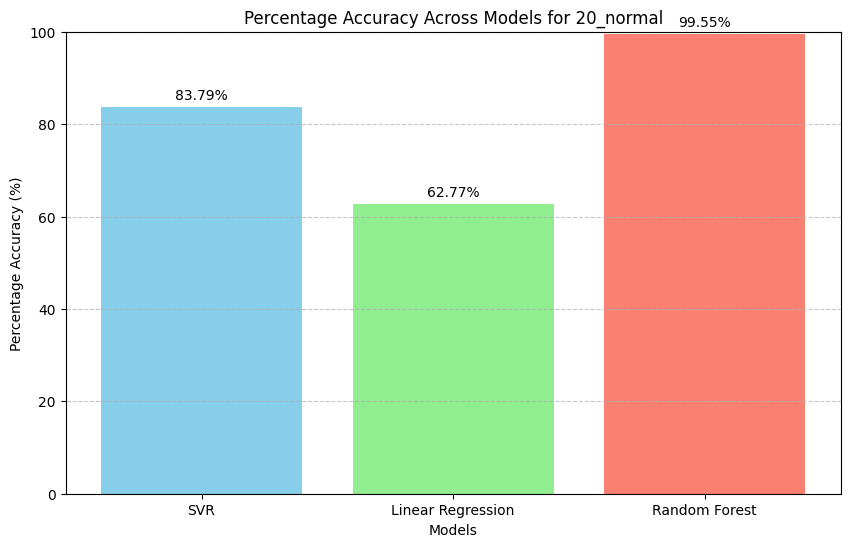

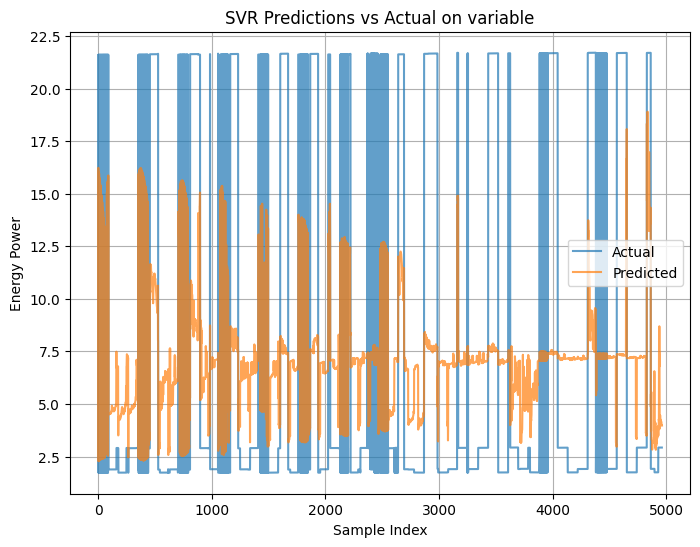

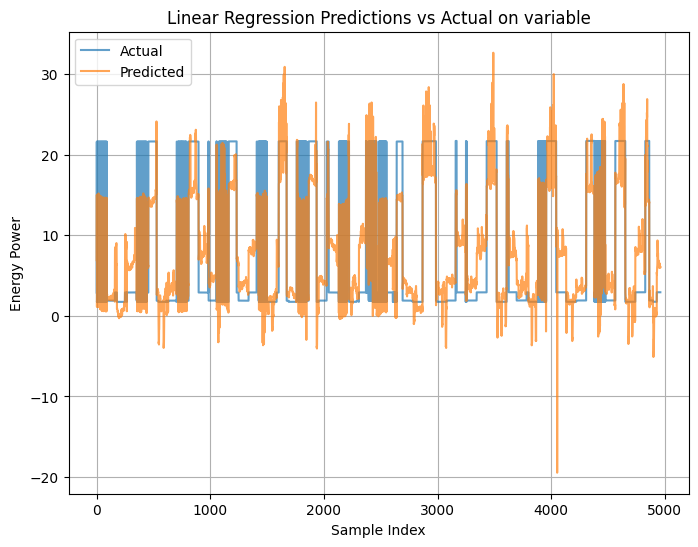

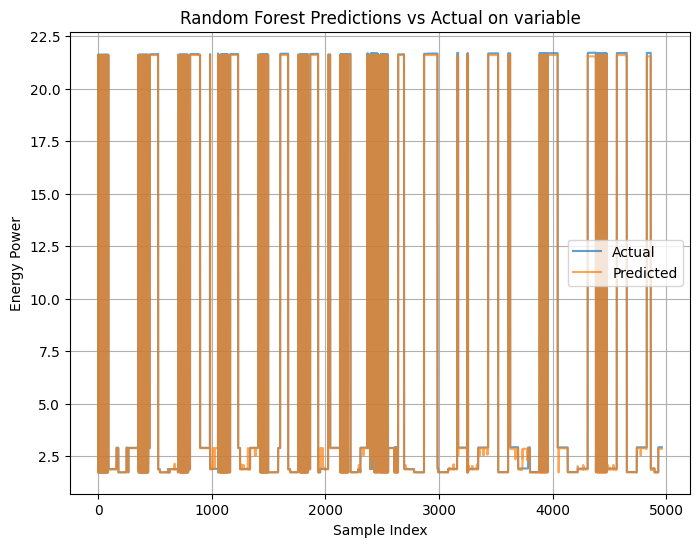

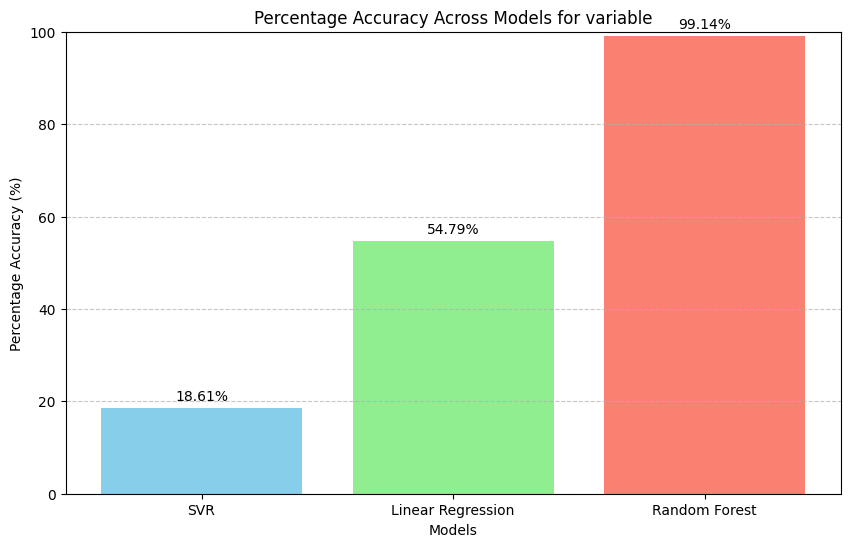

In [47]:
results = {}
for test_path in test_paths:
    X_test, y_test = preprocess_data(test_path)
    X_test_scaled = scaler.transform(X_test)
    
    dataset_name = test_path.split('/')[-1].replace('.csv', '')  # Get dataset name from path

    results[dataset_name] = {}
    
    for name, model in trained_models.items():
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mean_actual = y_test.mean()
        percentage_accuracy = max(0, (1 - mae / mean_actual) * 100)  # Ensure accuracy is non-negative
        
        results[dataset_name][name] = {
            "MSE": mse,
            "R2 Score": r2,
            "Percentage Accuracy": percentage_accuracy
        }
        
        # Plot predictions vs actual
        plot_title = f"{name} Predictions vs Actual on {dataset_name}"
        plot_results(y_test, y_pred, plot_title)

    # Plot bar chart for percentage accuracy
    plot_percentage_accuracy({dataset_name: results[dataset_name]})

## results

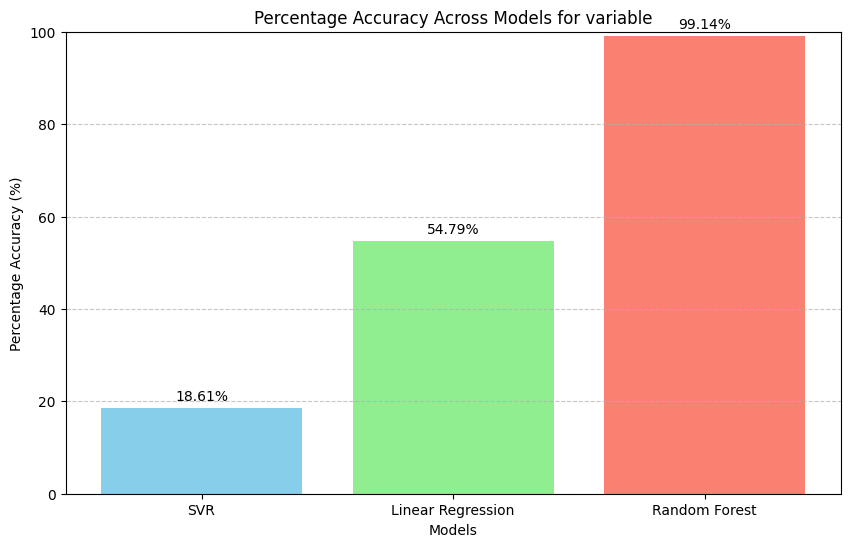

In [48]:
plot_percentage_accuracy({dataset_name: results[dataset_name]})

In [49]:
# print("\nComparison of Model Performance Across Datasets:")
# for dataset, metrics in results.items():
#     print(f"\nTesting on {dataset}:")
#     for model_name, performance in metrics.items():
#         print(f"{model_name}: MSE = {performance['MSE']:.4f}, R2 = {performance['R2 Score']:.4f}")


## Display results
print("\nComparison of Model Performance Across Datasets:")
for dataset, metrics in results.items():
    print(f"\nTesting on {dataset}:")
    for model_name, performance in metrics.items():
        print(
            f"{model_name}: MSE = {performance['MSE']:.4f}, "
            f"R2 = {performance['R2 Score']:.4f}, "
            f"Accuracy = {performance['Percentage Accuracy']:.2f}%"
        )




Comparison of Model Performance Across Datasets:

Testing on idle:
SVR: MSE = 69.9882, R2 = -0.0864, Accuracy = 2.74%
Linear Regression: MSE = 61.9774, R2 = 0.0380, Accuracy = 20.82%
Random Forest: MSE = 76.3141, R2 = -0.1846, Accuracy = 33.77%

Testing on low:
SVR: MSE = 22.8289, R2 = 0.6849, Accuracy = 49.90%
Linear Regression: MSE = 12.2186, R2 = 0.8313, Accuracy = 60.91%
Random Forest: MSE = 0.1777, R2 = 0.9975, Accuracy = 97.73%

Testing on 20_normal:
SVR: MSE = 5.1801, R2 = 0.9324, Accuracy = 83.79%
Linear Regression: MSE = 12.8653, R2 = 0.8322, Accuracy = 62.77%
Random Forest: MSE = 0.5878, R2 = 0.9923, Accuracy = 99.55%

Testing on variable:
SVR: MSE = 50.1053, R2 = 0.3010, Accuracy = 18.61%
Linear Regression: MSE = 15.6247, R2 = 0.7820, Accuracy = 54.79%
Random Forest: MSE = 0.0264, R2 = 0.9996, Accuracy = 99.14%
